<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/mmpose%E3%82%92%E8%A9%A6%E3%81%99_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmpose を試す (1)

## 準備

In [1]:
# このセルを実行後，再起動が必要
!pip install openmim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.9 MB/s eta 0:0

In [1]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 846.4 kB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [2]:
!mim install mmdet mmcv mmpose

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmdet: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### ソースコードを書き換える

In [3]:
%%writefile mmdet__init__.diff
--- a/__init__.py	2024-10-14 23:25:34.068213962 +0000
+++ b/__init__.py	2024-10-14 23:25:50.141760514 +0000
@@ -6,7 +6,7 @@ from mmengine.utils import digit_version
 from .version import __version__, version_info

 mmcv_minimum_version = '2.0.0rc4'
-mmcv_maximum_version = '2.2.0'
+mmcv_maximum_version = '2.3.0'
 mmcv_version = digit_version(mmcv.__version__)

 mmengine_minimum_version = '0.7.1'

Writing mmdet__init__.diff


In [4]:
!cd /usr/local/lib/python3.10/dist-packages/mmdet && patch -p1 < /content/mmdet__init__.diff

patching file __init__.py


## デモ用の画像をダウンロードする

In [5]:
!wget -P tests/data/coco https://raw.githubusercontent.com/open-mmlab/mmpose/refs/heads/main/tests/data/coco/000000000785.jpg

--2024-10-15 21:21:07--  https://raw.githubusercontent.com/open-mmlab/mmpose/refs/heads/main/tests/data/coco/000000000785.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133674 (131K) [image/jpeg]
Saving to: ‘tests/data/coco/000000000785.jpg’

000000000785.jpg    100%[===================>] 130.54K  --.-KB/s    in 0.02s   

2024-10-15 21:21:07 (7.14 MB/s) - ‘tests/data/coco/000000000785.jpg’ saved [133674/133674]



## Topdown Heatmap + Hrnet on Coco モデルを試す

*   https://mmpose.readthedocs.io/en/latest/model_zoo_papers/backbones.html#topdown-heatmap-hrnet-on-coco
*   HRNet (CVPR'2019)
*   COCO (ECCV'2014)

In [6]:
!mim download mmpose --config td-hm_hrnet-w48_8xb32-210e_coco-256x192 --dest .

processing td-hm_hrnet-w48_8xb32-210e_coco-256x192...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.7/256.7 MiB 19.9 MB/s eta 0:00:00
Successfully downloaded td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth to /content
Successfully dumped td-hm_hrnet-w48_8xb32-210e_coco-256x192.py to /content


In [7]:
!ls -l *hrnet*

-rw-r--r-- 1 root root 269176125 Oct 15 21:21 td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth
-rw-r--r-- 1 root root      7993 Oct 15 21:21 td-hm_hrnet-w48_8xb32-210e_coco-256x192.py


In [8]:
from mmpose.apis import init_model

config = './td-hm_hrnet-w48_8xb32-210e_coco-256x192.py'
checkpoint = './td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth'
device = 'cuda:0'
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True)))

model = init_model(config, checkpoint, device, cfg_options)

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Loads checkpoint by local backend from path: ./td-hm_hrnet-w48_8xb32-210e_coco-256x192-0e67c616_20220913.pth


/usr/local/lib/python3.10/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

In [9]:
radius = 3
alpha = 0.8
thickness = 1

# init visualizer
model.cfg.visualizer.radius = radius
model.cfg.visualizer.alpha = alpha
model.cfg.visualizer.line_width = thickness

In [10]:
from mmpose.registry import VISUALIZERS

skeleton_style = 'mmpose'

visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.set_dataset_meta(
    model.dataset_meta, skeleton_style=skeleton_style)

In [11]:
from mmpose.apis import inference_topdown
from mmpose.structures import merge_data_samples

img = 'tests/data/coco/000000000785.jpg'

# inference a single image
batch_results = inference_topdown(model, img)
results = merge_data_samples(batch_results)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [204, 207, 214],
        [204, 207, 214],
        ...,
        [218, 218, 220],
        [218, 218, 220],
        [218, 218, 220]],

       [[  0, 255,   0],
        [205, 208, 215],
        [205, 208, 215],
        ...,
        [219, 219, 221],
        [219, 219, 221],
        [219, 219, 221]],

       ...,

       [[114, 114, 178],
        [110, 110, 176],
        [106, 106, 171],
        ...,
        [ 98,  99, 166],
        [ 98, 100, 166],
        [ 99, 100, 167]],

       [[110, 110, 175],
        [110, 110, 174],
        [110, 109, 176],
        ...,
        [ 95,  96, 164],
        [ 95,  96, 164],
        [ 96,  97, 164]],

       [[108, 108, 175],
        [106, 106, 172],
        [110, 110, 176],
        ...,
        [ 93,  95, 164],
        [ 94,  96, 166],
        [ 94,  97, 163]]], dtype=uint8)
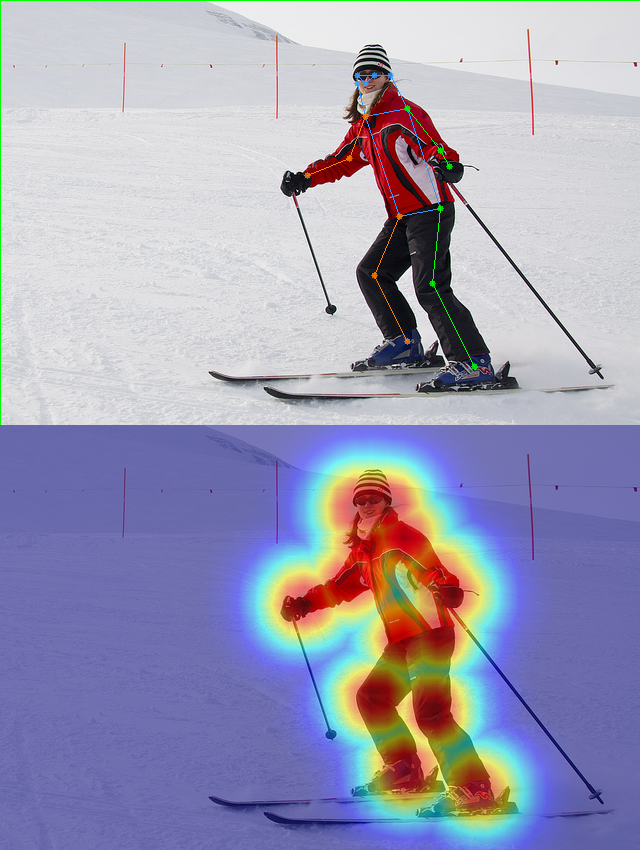

In [12]:
from mmcv.image import imread

kpt_thr = 0.3  # Visualizing keypoint thresholds
draw_heatmap = True  # Visualize the predicted heatmap
show_kpt_idx = False  # Whether to show the index of keypoints
show = False  # whether to show img
out_file = 'vis_results.jpg'

# show the results
img = imread(img, channel_order='rgb')
visualizer.add_datasample(
    'result',
    img,
    data_sample=results,
    draw_gt=False,
    draw_bbox=True,
    kpt_thr=kpt_thr,
    draw_heatmap=draw_heatmap,
    show_kpt_idx=show_kpt_idx,
    skeleton_style=skeleton_style,
    show=show,
    out_file=out_file)